In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn import metrics  # 평가를 위한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import seaborn as sns  # 시각화 라이브러리

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day_text     7000 non-null   object 
 1   team_text    7000 non-null   object 
 2   H_text       7000 non-null   int64  
 3   HR_text      7000 non-null   int64  
 4   S_text       7000 non-null   int64  
 5   ST_text      7000 non-null   int64  
 6   DU_text      7000 non-null   int64  
 7   ER_text      7000 non-null   int64  
 8   result_text  7000 non-null   int64  
 9   location     7000 non-null   object 
 10  temp         7000 non-null   float64
 11  rain         7000 non-null   float64
 12  humidity     7000 non-null   float64
dtypes: float64(3), int64(7), object(3)
memory usage: 711.1+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398 entries, 0 to 3397
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day_text     3398 non-null   object 
 1   team_text    3398 non-null   object 
 2   H_text       3398 non-null   int64  
 3   HR_text      3398 non-null   int64  
 4   S_text       3398 non-null   int64  
 5   ST_text      3398 non-null   int64  
 6   DU_text      3398 non-null   int64  
 7   ER_text      3398 non-null   int64  
 8   result_text  3398 non-null   int64  
 9   location     3398 non-null   object 
 10  temp         3398 non-null   float64
 11  rain         3398 non-null   float64
 12  humidity     3398 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 345.2+ KB


In [5]:
#train.drop('humidity',inplace = True, axis =1 )
#test.drop('humidity',inplace =True, axis=1)

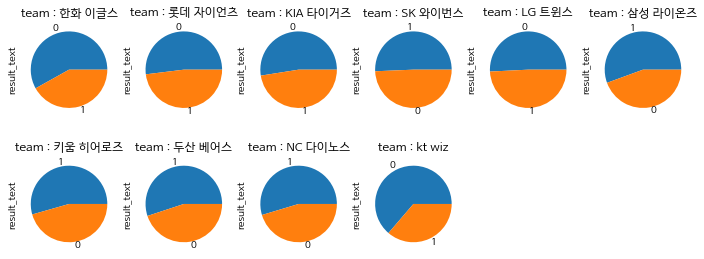

In [6]:
import matplotlib
matplotlib.rc('font', family='Hancom Gothic')  
fig = plt.figure(figsize=(12,7))

i=1
for title in train['team_text'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('team : {}'.format(title))
    train.result_text[train['team_text'] == title].value_counts().plot(kind='pie')
    i += 1

<AxesSubplot:xlabel='ER_text', ylabel='count'>

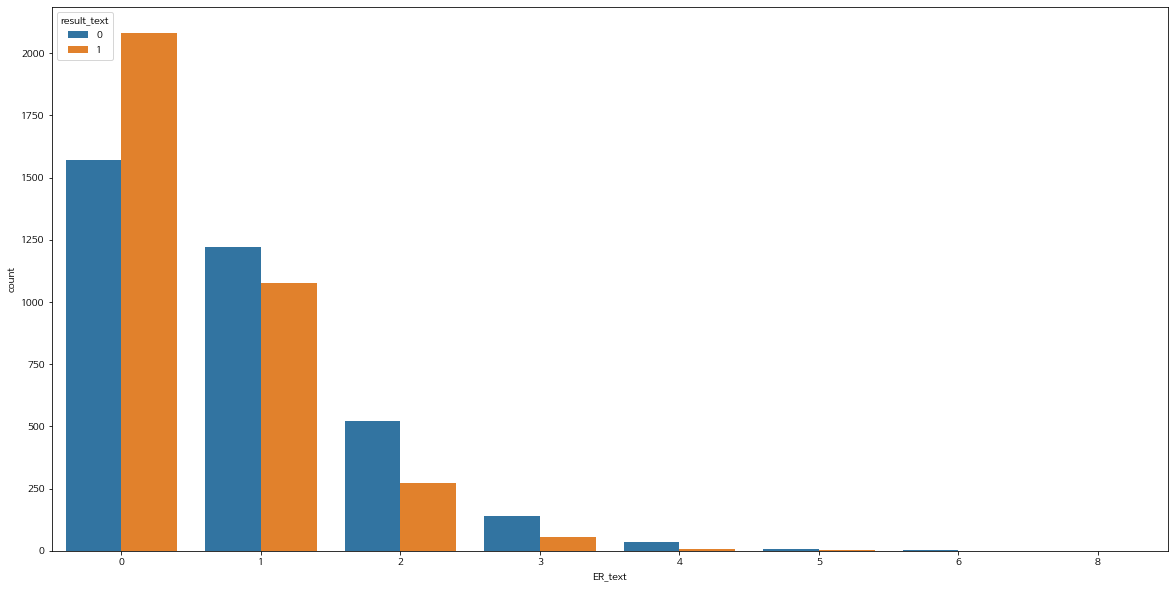

In [7]:
fig=plt.figure(figsize=(20,10))
sns.countplot(data = train, x = 'ER_text', hue='result_text')

<AxesSubplot:xlabel='HR_text', ylabel='count'>

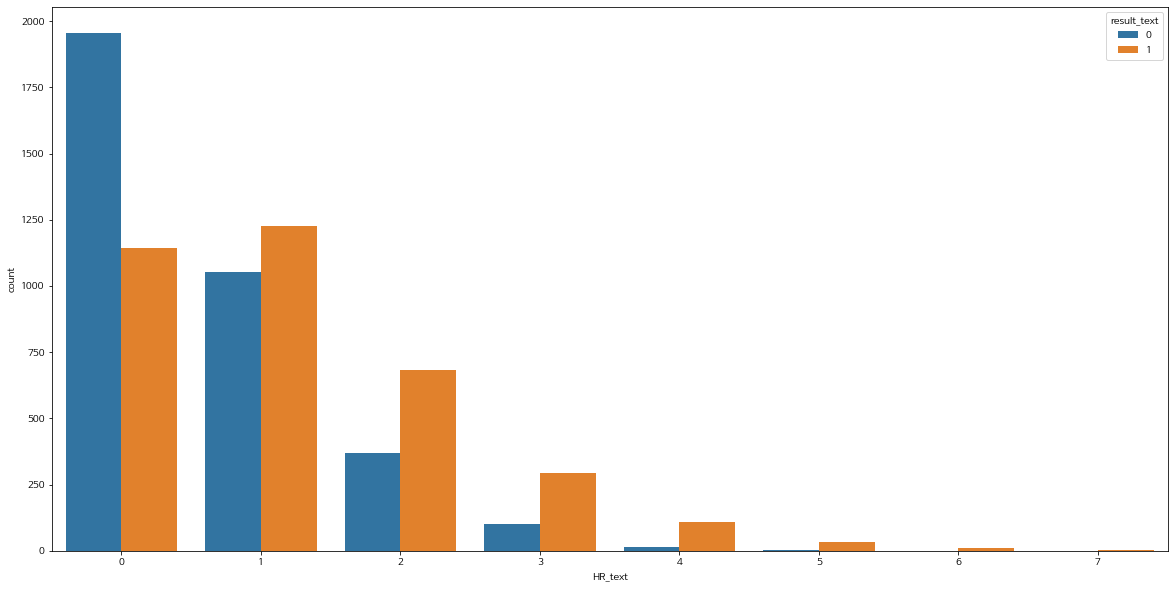

In [8]:
fig=plt.figure(figsize=(20,10))
sns.countplot(data = train, x = 'HR_text', hue='result_text')

<AxesSubplot:xlabel='humidity', ylabel='count'>

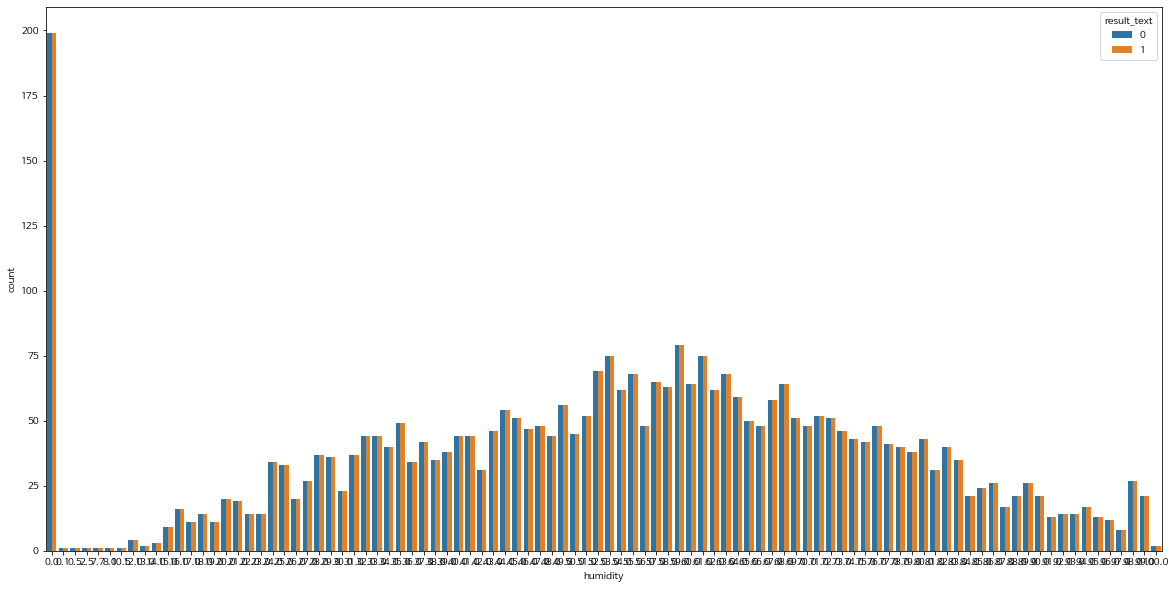

In [9]:
fig=plt.figure(figsize=(20,10))
sns.countplot(data = train, x = 'humidity', hue='result_text')

In [10]:
#train_and_test = [train, test]
#for dataset in train_and_test:
#    dataset['HR_text'].fillna(dataset['HR_text'].mean(), inplace=True)
#    dataset['HR_text'] = dataset['HR_text'].astype(int)
#    dataset['HR_Group'] = pd.cut(dataset['HR_text'], 3)
    
#print (train[['HR_Group', 'result_text']].groupby(['HR_Group'], as_index=False).mean()) # Survivied ratio about Age Group


In [11]:
#for dataset in train_and_test:
#    dataset.loc[ dataset['HR_text'] <= 1.667, 'HR_text'] = 0
#    dataset.loc[(dataset['HR_text'] > 1.667) & (dataset['HR_text'] <= 3.333), 'HR_text'] = 1
#    dataset.loc[(dataset['HR_text'] > 3.333) & (dataset['HR_text'] <= 5.0), 'HR_text'] = 2
    
#    dataset['HR_text'] = dataset['HR_text'].map( { 0: 'HR1',  1: 'HR2', 2: 'HR3'}).astype(str)

### day_text drop 

In [12]:
train.drop('day_text', axis = 1 , inplace = True)
test.drop('day_text', axis = 1 , inplace = True)
train.drop('rain', axis = 1 , inplace = True)
test.drop('rain', axis = 1 , inplace = True)

<AxesSubplot:xlabel='H_text', ylabel='count'>

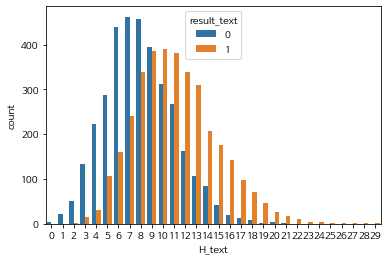

In [13]:
sns.countplot(data=train, x='H_text', hue = 'result_text')

### 정규화

In [14]:
train_test_data = [train, test]

In [15]:
from sklearn.preprocessing import StandardScaler
for dataset in train_test_data:
    dataset['H_text'] = StandardScaler().fit_transform(dataset['H_text'].values.reshape(-1, 1))
    dataset['HR_text'] = StandardScaler().fit_transform(dataset['HR_text'].values.reshape(-1, 1))
    dataset['S_text'] = StandardScaler().fit_transform(dataset['S_text'].values.reshape(-1, 1))
    dataset['ST_text'] = StandardScaler().fit_transform(dataset['ST_text'].values.reshape(-1, 1))
    dataset['DU_text'] = StandardScaler().fit_transform(dataset['DU_text'].values.reshape(-1, 1))
    dataset['ER_text'] = StandardScaler().fit_transform(dataset['ER_text'].values.reshape(-1, 1))
    dataset['temp'] = StandardScaler().fit_transform(dataset['temp'].values.reshape(-1, 1))
    #dataset['rain'] = StandardScaler().fit_transform(dataset['rain'].values.reshape(-1, 1))
    dataset['humidity'] = StandardScaler().fit_transform(dataset['humidity'].values.reshape(-1, 1))

In [16]:
#train.drop('HR_text', axis = 1 , inplace = True)
#test.drop('HR_text', axis = 1 , inplace = True)

In [17]:
y_train = train['result_text']
X_train = train.drop('result_text', axis = 1)
y_test = test['result_text']
X_test = test.drop('result_text', axis = 1)

In [18]:
cat_feature = ["team_text","location"]

In [19]:
for i in cat_feature:
    dummy = pd.get_dummies(train[i], prefix=i)
    X_train = pd.concat([X_train, dummy], axis=1)
    X_train.drop(i, axis=1, inplace = True)

In [20]:
for i in cat_feature:
    dummy = pd.get_dummies(test[i], prefix=i)
    X_test = pd.concat([X_test, dummy], axis=1)
    X_test.drop(i, axis=1, inplace = True)

In [21]:
set(X_train.columns) - set(X_test.columns)

set()

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   H_text              7000 non-null   float64
 1   HR_text             7000 non-null   float64
 2   S_text              7000 non-null   float64
 3   ST_text             7000 non-null   float64
 4   DU_text             7000 non-null   float64
 5   ER_text             7000 non-null   float64
 6   temp                7000 non-null   float64
 7   humidity            7000 non-null   float64
 8   team_text_KIA 타이거즈  7000 non-null   uint8  
 9   team_text_LG 트윈스    7000 non-null   uint8  
 10  team_text_NC 다이노스   7000 non-null   uint8  
 11  team_text_SK 와이번스   7000 non-null   uint8  
 12  team_text_kt wiz    7000 non-null   uint8  
 13  team_text_두산 베어스    7000 non-null   uint8  
 14  team_text_롯데 자이언츠   7000 non-null   uint8  
 15  team_text_삼성 라이온즈   7000 non-null   uint8  
 16  team_t

### K Fold

In [23]:
# Importing Classifier Modules# Import 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = SVC()
# clf = DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("예측 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

예측 정확도: 0.72


In [24]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 940


## XGBOOST

In [25]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [26]:
xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.05, max_depth = 5)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

[20:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\smhrd\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [27]:
print("총 승패 갯수 %d 에서 틀린 예측 갯수 : %d" % (X_test.shape[0], (y_test != xgb_pred).sum()))

총 승패 갯수 3398 에서 틀린 예측 갯수 : 958


In [28]:
print("예측 정확도: {:.2f}".format(np.mean(xgb_pred == y_test)))

예측 정확도: 0.72
